In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [10]:
train_df.shape

(60000, 785)

In [11]:
test_df.shape

(10000, 785)

In [12]:
training = np.array(train_df, dtype='float32')

In [13]:
testing = np.array(test_df, dtype='float32')

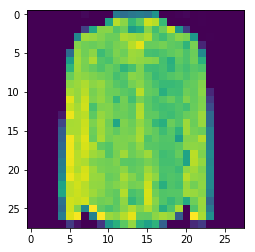

In [14]:
plt.imshow(training[2,1:].reshape(28,28))

In [15]:
x_train = training[:,1:]/255
x_test = testing[:,1:]/255
y_train = training[:,0]
y_test = testing[:,0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=12345)

In [22]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))
x_validate = x_validate.reshape(x_validate.shape[0], *(28,28,1))


In [57]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [58]:
cnn_model = Sequential()

In [59]:
cnn_model.add(Conv2D(128,3,3,input_shape=(28,28,1),activation='relu'))

/home/danyshman/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [60]:
cnn_model.add(MaxPool2D(pool_size=(2,2)))

In [61]:
cnn_model.add(Flatten())

In [62]:
cnn_model.add(Dense(output_dim=32,activation='relu'))
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

/home/danyshman/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
/home/danyshman/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [63]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [64]:
epochs = 50

In [65]:
cnn_model.fit(x_train,y_train, batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(x_validate,y_validate))

/home/danyshman/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 217s 5ms/step - loss: 0.8326 - acc: 0.7089 - val_loss: 0.4740 - val_acc: 0.8395
Epoch 2/50
48000/48000 [==============================] - 213s 4ms/step - loss: 0.4405 - acc: 0.8457 - val_loss: 0.4104 - val_acc: 0.8558
Epoch 3/50
48000/48000 [==============================] - 208s 4ms/step - loss: 0.3805 - acc: 0.8671 - val_loss: 0.3846 - val_acc: 0.8653
Epoch 4/50
48000/48000 [==============================] - 194s 4ms/step - loss: 0.3450 - acc: 0.8797 - val_loss: 0.3383 - val_acc: 0.8811
Epoch 5/50
48000/48000 [==============================] - 214s 4ms/step - loss: 0.3194 - acc: 0.8878 - val_loss: 0.3258 - val_acc: 0.8835
Epoch 6/50
48000/48000 [==============================] - 214s 4ms/step - loss: 0.3029 - acc: 0.8930 - val_loss: 0.2983 - val_acc: 0.8982
Epoch 7/50
48000/48000 [==============================] - 215s 4ms/step - loss: 0.2850 - acc: 0.8992 - val_loss: 0.2991 - 

In [67]:
evaluation = cnn_model.evaluate(x_test,y_test)
evaluation

10000/10000 [==============================] - 30s 3ms/step


[0.2915643140435219, 0.9136]

In [68]:
predicted_classes = cnn_model.predict_classes(x_test)

In [69]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
cm = confusion_matrix(y_test, predicted_classes)

In [72]:
cm

array([[886,   0,  14,   9,   2,   1,  80,   0,   8,   0],
       [  4, 986,   1,   6,   2,   0,   1,   0,   0,   0],
       [ 20,   1, 802,  10,  88,   0,  78,   0,   1,   0],
       [ 29,   7,   6, 891,  36,   0,  29,   0,   2,   0],
       [  2,   0,  18,  13, 906,   0,  61,   0,   0,   0],
       [  0,   1,   0,   0,   0, 964,   0,  20,   2,  13],
       [113,   3,  32,  15,  55,   0, 778,   0,   4,   0],
       [  0,   0,   0,   0,   0,   3,   0, 973,   0,  24],
       [  3,   2,   1,   1,   1,   2,   6,   2, 982,   0],
       [  0,   0,   0,   0,   1,   1,   0,  30,   0, 968]])

In [73]:
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.89      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.92      0.80      0.86      1000
     Class 3       0.94      0.89      0.92      1000
     Class 4       0.83      0.91      0.87      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.75      0.78      0.77      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

